In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
import sys
caffe_root = '../../'
sys.path.insert(0, caffe_root + 'python')
import caffe
import scipy.io as sio

../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [3]:
# use ER CNN
svname = 'ck_er_vis.mat'
model_def = caffe_root +'yyp/CKVIS/ER_c12c24c32.prototxt'
model_weights = caffe_root+'yyp/CKER/CKER_c12c24c32_4000.caffemodel'
# use ID CNN
#svname = 'ck_id_vis.mat'
#model_def = caffe_root +'yyp/CKVIS/ID_c12c24c32.prototxt'
#model_weights = caffe_root+'yyp/CKID/CKID_c12c24c32_4000.caffemodel'

In [4]:
caffe.set_mode_cpu()
net = caffe.Net(model_def,model_weights,caffe.TEST)     
net.forward()  
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(24, 3, 48, 48)
label	(24,)
label_cker_1_split_0	(24,)
label_cker_1_split_1	(24,)
conv1	(24, 12, 44, 44)
pool1	(24, 12, 22, 22)
conv2	(24, 24, 19, 19)
pool2	(24, 24, 10, 10)
conv3	(24, 32, 8, 8)
pool3	(24, 32, 4, 4)
ip1	(24, 500)
ip2	(24, 1000)
ip2_ip2_0_split_0	(24, 1000)
ip2_ip2_0_split_1	(24, 1000)
accuracy	()
loss	()


In [5]:
##### save output data
c1data = net.blobs['conv1'].data
c2data = net.blobs['conv2'].data
c3data = net.blobs['conv3'].data
p1data = net.blobs['pool1'].data
p2data = net.blobs['pool2'].data
p3data = net.blobs['pool3'].data
i1data = net.blobs['ip1'].data
i2data = net.blobs['ip2'].data
labels = net.blobs['label'].data
imgdata = net.blobs['data'].data
sio.savemat(svname, {'labels':labels,'imgdata':imgdata,'conv1': c1data,'conv2': c2data,'conv3': c3data,'pool1': p1data,'pool2': p2data,'pool3': p3data,'ip1': i1data,'ip2': i2data})
data=sio.loadmat(svname)

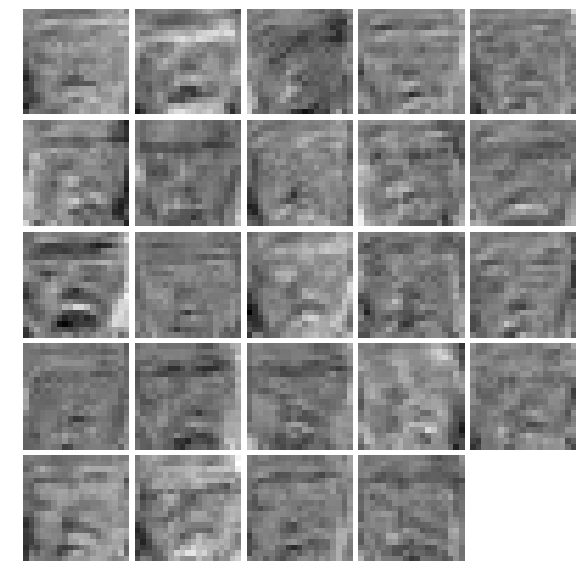

In [6]:
feat = net.blobs['conv2'].data[1, :36]
vis_square(feat)

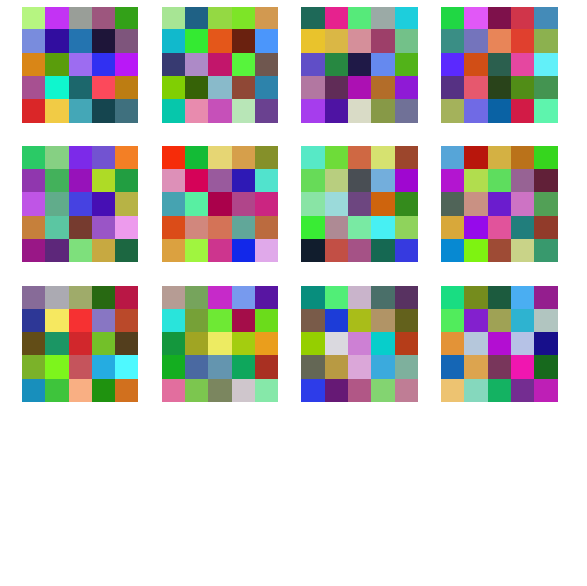

In [7]:
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

filters = net.params['conv1'][0].data
plt.hist(filters.flat, bins=100)

(array([  3.,   1.,   4.,   3.,   4.,   5.,  10.,   7.,  13.,  14.,  11.,
         18.,  10.,   5.,   4.,   8.,  13.,  11.,   5.,   8.,   8.,  12.,
          8.,  12.,   6.,   9.,   9.,  16.,   8.,  10.,   9.,  13.,   8.,
         11.,  18.,   9.,  10.,   5.,  12.,   8.,   9.,  11.,   9.,   7.,
         11.,  11.,   6.,   7.,   8.,  15.,   7.,   8.,  14.,   6.,  12.,
          6.,  13.,   4.,  12.,   9.,  15.,   8.,  14.,   9.,  12.,   9.,
         10.,   8.,  10.,  17.,   9.,  11.,  11.,   7.,   6.,   4.,   8.,
         10.,  10.,   7.,  11.,  12.,  10.,   8.,   8.,  14.,  15.,   3.,
          9.,   7.,   9.,  13.,   6.,   7.,   6.,   6.,   9.,   5.,   2.,
          2.]),
 array([-0.20967939, -0.20548065, -0.20128191, -0.19708316, -0.19288442,
        -0.18868567, -0.18448693, -0.18028819, -0.17608944, -0.1718907 ,
        -0.16769195, -0.16349321, -0.15929447, -0.15509572, -0.15089698,
        -0.14669823, -0.14249949, -0.13830075, -0.134102  , -0.12990326,
        -0.12570451, -0.12

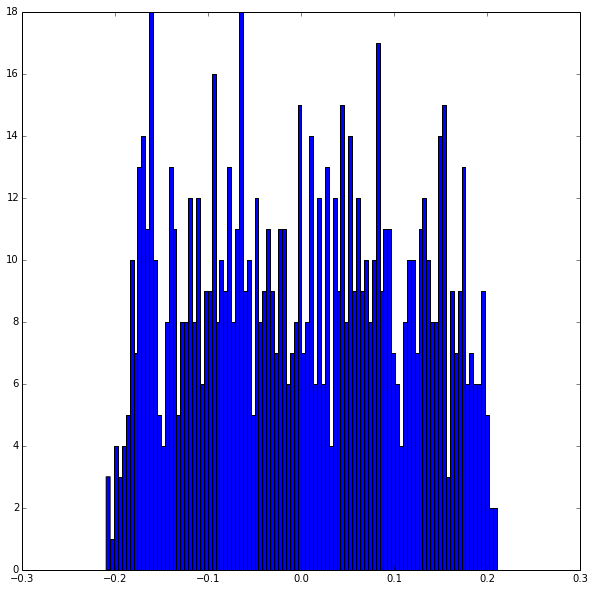

In [10]:
filters = net.params['conv1'][0].data
plt.hist(filters.flat, bins=100)